In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
dict1={'Hours':[1,2,3,4,5,6.6,7,8,9.5,10.5,11,12,13,14,15,16.6,17.7,18,19,20],"Marks":[10,15,20,21,25,29,30.6,34,37,38.5,39,40,42,45,47.6,50,51,53.9,57,59]}
df=pd.DataFrame(dict1)
df.head()

,Hours,Marks
0,1.0,10.0
1,2.0,15.0
2,3.0,20.0
3,4.0,21.0
4,5.0,25.0


In [3]:
df.shape

(20, 2)

In [4]:
y=df["Marks"]
X=df[['Hours']]

In [5]:
print(y.shape)
print(X.shape)

(20,)
(20, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

In [8]:

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14, 1) (14,)
(6, 1) (6,)


In [9]:
X_train.head()

,Hours
6,7.0
13,14.0
4,5.0
2,3.0
5,6.6


In [10]:
X_test.head()

,Hours
18,19.0
1,2.0
19,20.0
8,9.5
10,11.0


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('y intercept:',regressor.intercept_)
print('slope:',regressor.coef_)

y intercept: 12.51520619752283
slope: [2.3124971]


In [13]:
y_test_pred=regressor.predict(X_test)

In [14]:
temp_df=pd.DataFrame({'Actual':y_test,'predicted':y_test_pred})
temp_df

,Actual,predicted
18,57.0,56.452651
1,15.0,17.140200
19,59.0,58.765148
8,37.0,34.483929
10,39.0,37.952674
17,53.9,54.140154


In [15]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.1209920211532183
Mean Squared Error:  2.0700639987629637
Root Mean Squared Error:  1.4387716979295095


In [16]:
print(metrics.r2_score(y_test, y_test_pred))

0.9911624374937928


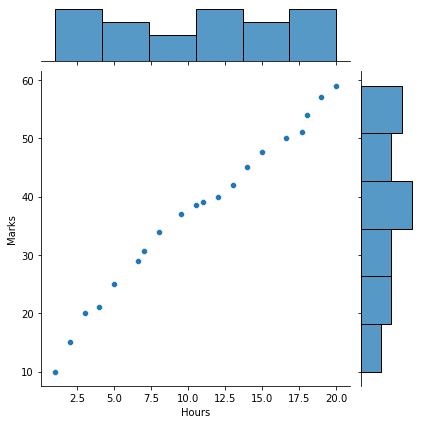

In [17]:
sns.jointplot(x='Hours', y='Marks', data=df, kind = 'scatter')

In [18]:
df.corr()

,Hours,Marks
Hours,1.000000,0.991882
Marks,0.991882,1.000000


<AxesSubplot:>

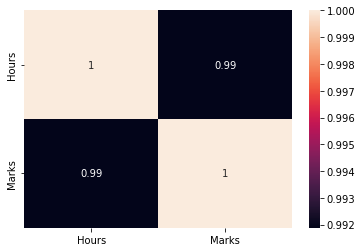

In [19]:
plt.figure()
sns.heatmap(df.corr(), annot = True)

In [20]:
y_train_pred = regressor.predict(X_train)

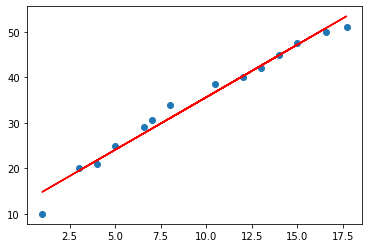

In [21]:
plt.scatter(X_train['Hours'], y_train)

plt.plot(X_train['Hours'], y_train_pred, 'r')

plt.show()

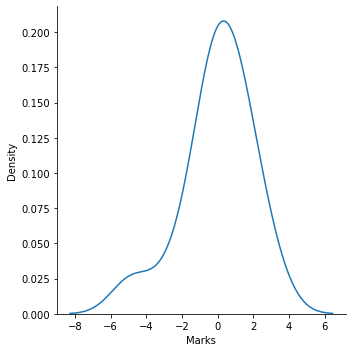

In [22]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

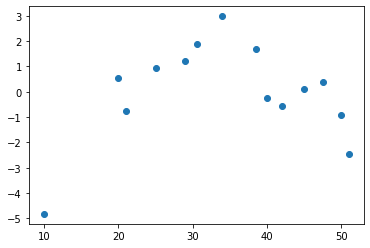

In [23]:
plt.scatter(y_train, residual)

plt.show()